In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
import os
import numpy as np

import matplotlib as mpl

mpl.rcParams.update({"figure.facecolor": "white"})

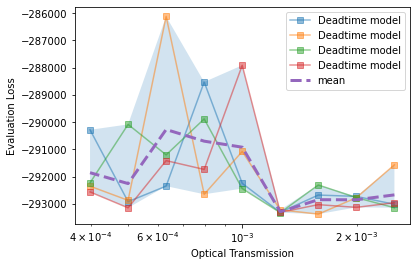

In [41]:
load_dir = r'C:\Users\Grant\OneDrive - UCB-O365\ARSENL\Experiments\SPCM\evaluation_loss\low_flux_noise_spread'

fig = plt.figure()
ax = fig.add_subplot(111)

files = os.listdir(load_dir)
eval_loss_dtime_spread = []
for i in range(len(files)):
    df_dtime = pd.read_csv(load_dir + r'/' + files[i])
#     df_pois = pd.read_csv(load_dir + r'/eval_loss_dtimeFalse_OD1.5E+00-3.4E+00_order7-21_shots2.50E+05.csv')
    eval_loss_dtime = df_dtime['Evaluation Loss'].dropna()
#     eval_loss_pois = df_pois['Evaluation Loss'].dropna()
    percent_active = df_dtime['Average %-age where Detector was Active'].dropna()
    optimal_C = df_dtime['Optimal Scaling Factor'].dropna()

    OD = df_dtime['OD']
    transmit_factor = 10**(-OD)
    eval_loss_dtime = eval_loss_dtime
#     eval_loss_pois = eval_loss_pois
    percent_active = percent_active
       
    transmit_factor = 10**(-OD)
    atten_factor = 1-transmit_factor

    skip_num = 0
    ax.plot(transmit_factor[skip_num:], eval_loss_dtime[skip_num:], 's-', label='Deadtime model', alpha=0.5)
#     ax.plot(transmit_factor[skip_num:], eval_loss_pois[skip_num:], '^-', color='orange', markeredgecolor='black', label='Poisson model')
    ax.set_xlabel('Optical Transmission')
    ax.set_ylabel('Evaluation Loss')
    
    eval_loss_dtime_spread.append(eval_loss_dtime)
    
min_eval = np.min(eval_loss_dtime_spread, axis=0)
max_eval = np.max(eval_loss_dtime_spread, axis=0)
mean_eval = np.mean(eval_loss_dtime_spread, axis=0)

ax.fill_between(transmit_factor[skip_num:], min_eval, max_eval, alpha=0.2)
ax.plot(transmit_factor[skip_num:], mean_eval, '--', linewidth='3', label='mean')
plt.legend()
plt.xscale('log')
plt.show()
    


# df_pois = pd.read_csv(load_dir + r'/eval_loss_dtimeFalse_OD1.5E+00-3.4E+00_order7-21_shots2.50E+05.csv')